# Capítulo 16

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
import seaborn as sns

## Ejercicio 1

La prueba A tiene une eficiencia del 80% respecto a la prueba B. Si en la prueba B empleamos un total de 24 sujetos, ¿cuál es el N requerido para conseguir una potencia igual con la prueba A?

In [2]:
n_A = 24
eficiencia = 0.8

n_B = n_A / eficiencia

print('N requerido para igual potencia:', round(n_B))

N requerido para igual potencia: 30


## Ejercicio 2

### Cálculo manual

In [3]:
from scipy.stats import norm

u0 = 70
u1 = 72 # Porque si no es una escala es la otra. Hipótesis unilateral hacia el lado mayor
desvio_estandar = 5
n = 100

error_estandar = desvio_estandar / np.sqrt(n)

z_critico = norm.ppf(0.99)
"""
Usamos la PPF de la curva normal, que a cada valor de probabilidad
le asigna la calificación correspondiente. No especificamos media
ni desvío estándar porque queremos una calificación estandarizada z,
lo que implica que la media es 0 y el desvío 1, valores por defecto
en la función invocada en Python.

¿Y por qué 0.99 como valor de probabilidad, si el nivel de confianza
es 0.01? Porque la hipótesis es unilateral pero hacia la derecha, el
valor de la hipótesis alternativa es mayor que el de la hipótesis nula.
Entonces hay que irse a la cola derecha de la distribución, y como
1 - 0.01 = 0.99, se ingresa ese valor.
"""
print("Error estándar:", round(error_estandar, 4))
print("Z crítico:", round(z_critico, 4))

Error estándar: 0.5
Z crítico: 2.3263


In [6]:
valor_critico_X = z_critico * error_estandar + u0

"Calificación z de valor crítico en distribución bajo hipótesis nula"
z_valor_critico_X= (valor_critico_X - u1) / error_estandar

print("Valor crítico de la media para rechazar H0: ", round(valor_critico_X, 2))
print("Calificación z de valor crítico en distribución bajo hipótesis nula:", round(z_valor_critico_X, 2))

Valor crítico de la media para rechazar H0:  71.16
Calificación z de valor crítico en distribución bajo hipótesis nula: -1.67


Como la prueba es unilateral hacia la derecha, debemos hacer la resta:

1 - z crítico

para obtener la potencia.

Esto es así porque la función acumulativa de distibución (CDF) devuelve la probabilidad acumulada hasta ese punto, y nosotros queremos saber el área de la curva que falta.

In [7]:
"Probabilidad de valor crítico en distribución bajo hipótesis nula"
potencia = norm.cdf(z_valor_critico_X)

print("Potencia: ", round(100*(1 - potencia), 2))

Potencia:  95.29


Aclaración: el resultado presentado aquí es más preciso que el que da el libro porque se evitan errores de redondeo.

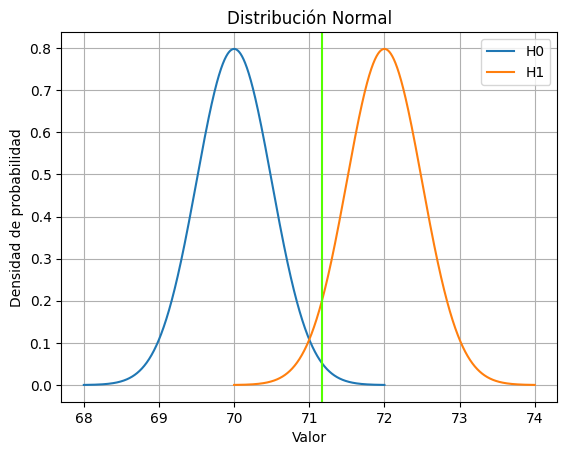

In [8]:
# Graficar las curvas

error_estandar = desvio_estandar / np.sqrt(n)

# Generar valores x para el eje x
x0 = np.linspace(68, 72, 1000)
x1 = np.linspace(70, 74, 1000)

# Calcular los valores de la curva normal para los valores x
y0 = norm(loc= u0, scale= error_estandar).pdf(x0)
y1 = norm(loc= u1, scale=error_estandar).pdf(x1)

# Graficar la curva normal
plt.plot(x0, y0, label='H0')
plt.plot(x1, y1, label='H1')

# Graficar el punto crítico
plt.axvline(x = valor_critico_X, color ='#55ff00')

plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal')
plt.legend()
plt.grid(True)
plt.show()



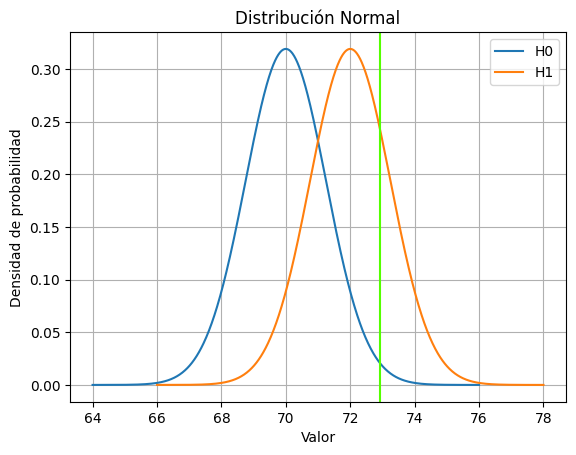

In [9]:
# Graficar las curvas
error_estandar = desvio_estandar / np.sqrt(16)

# Generar valores x para el eje x
x0 = np.linspace(64, 76, 1000)
x1 = np.linspace(66, 78, 1000)

# Calcular los valores de la curva normal para los valores x
y0 = norm(loc= u0, scale= error_estandar).pdf(x0)
y1 = norm(loc= u1, scale=error_estandar).pdf(x1)

# Graficar la curva normal
plt.plot(x0, y0, label='H0')
plt.plot(x1, y1, label='H1')

# Graficar el punto crítico
plt.axvline(x = 72.91, color ='#55ff00')

plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal')
plt.legend()
plt.grid(True)
plt.show()

No existe una forma de calcular con un módulo de Python para una muestra con calificaciones estandarizadas Z.

## Ejercicio 3

In [10]:
u1 = 80
u2 = 75
desvio_estandar = 6
n = 9

dif_medias_verdadera = u1 - u2

error_estandar1 = desvio_estandar / np.sqrt(n)
error_estandar2 = error_estandar1
error_estandar_diferencia = np.sqrt(error_estandar1**2 + error_estandar2**2)

z_critico = norm.ppf(0.99) # porque hipotesis alternativa es u1>u2. Entonces es que la diferencia es mayor a 0

valor_critico_diferencia = z_critico * error_estandar_diferencia # como si fuera un test de hipótesis

z_valor_critico_X = (valor_critico_diferencia - dif_medias_verdadera)/error_estandar_diferencia
potencia = 1- norm.cdf(z_valor_critico_X)

print("Potencia: ", round(100 * potencia, 2), "%")

Potencia:  28.82 %


## Ejercicio 4

a) Probabilidad de cometer error tipo I: dado que u1 es distinto de u2, no podemos cometer el error de rechazar falsamente la hipótesis nula. Probabilidad 0%

Ver código para la potencia y Beta. Acá sí existen esas probabilidaddes, porque la hipótesis alternativa es verdadera. Entonces podría pasar que no la rechacemos, cayendo en el error tipo II.

In [11]:
u1 = 100
u2 = 90
n = 25

dif_medias_verdadera = u1 - u2
desvio_estandar = 10

error_estandar1 = desvio_estandar / np.sqrt(n)
error_estandar2 = error_estandar1
error_estandar_diferencia = np.sqrt(error_estandar1**2 + error_estandar2**2)

z_critico_inferior = norm.ppf(0.995)
z_critico_superior = norm.ppf(0.005)

valor_critico_inferior_diferencia = z_critico_inferior * error_estandar_diferencia
valor_critico_superior_diferencia = z_critico_superior * error_estandar_diferencia

z_inferior_valor_critico_X = (valor_critico_inferior_diferencia - dif_medias_verdadera)/error_estandar_diferencia
z_superior_valor_critico_X = (valor_critico_superior_diferencia - dif_medias_verdadera)/error_estandar_diferencia
potencia = (1 - norm.cdf(z_inferior_valor_critico_X)) + norm.cdf(z_superior_valor_critico_X)

print("Potencia: ", round(100 * potencia, 2), "%")
print('Probablidad de error tipo II: ', round(100*(1 - potencia),2), "%")

Potencia:  83.14 %
Probablidad de error tipo II:  16.86 %


b) Probabilidad de error tipo I: acá, como sacamos de la misma población las dos muestras, sabemos que x1 = x2. Entonces, existe la probabilidad de rechazar falsamente la hipótesis nula. Esa probabilidad es el nivel de significancia de la prueba de hipótesis, alpha = 0.01

Probabilidad de error tipo II: no aplica, porque la hipótesis alternativa es falsa. Probabilidad = 0%

Potencia: no aplica.

## Ejercicio 5

Para el problema 6 del capítulo 13, calcular la potencia en cada uno de los cuatro ejemplos, empleando alpha = 0.01, examen unilateral. ¿Qué factores que influyen sobre la potencia son los que ilustran estos ejemplos?

La hipótesis alternativa es que x1-x2 ≥ 0. Es decir, que la x1 ≥ x2. El examen es unilateral hacia la derecha, porque la distribución de las diferencias tiene media 0 bajo H0.

Sabemos que la hipótesis alternativa es verdadera.

In [15]:
u1 = 80
u2 = 77
desvio_estandar = 6

error_estandar1 = np.sqrt(desvio_estandar**2/4 + desvio_estandar**2/4)
error_estandar2 = np.sqrt(desvio_estandar**2/9 + desvio_estandar**2/9)
error_estandar3 = np.sqrt(desvio_estandar**2/16 + desvio_estandar**2/16)
error_estandar4 = np.sqrt(desvio_estandar**2/25 + desvio_estandar**2/25)

dif = u1 - u2

z_critico = norm.ppf(0.99)

valor_critico_diferencia1 = z_critico * error_estandar1
valor_critico_diferencia2 = z_critico * error_estandar2
valor_critico_diferencia3 = z_critico * error_estandar3
valor_critico_diferencia4 = z_critico * error_estandar4

# Probabilidad de ese valor o mayor en distribución bajo H1

z1 = (valor_critico_diferencia1 - dif)/error_estandar1
z2 = (valor_critico_diferencia2 - dif)/error_estandar2
z3 = (valor_critico_diferencia3 - dif)/error_estandar3
z4 = (valor_critico_diferencia4 - dif)/error_estandar4

potencia1 = 1 - norm.cdf(z1)
potencia2 = 1 - norm.cdf(z2)
potencia3 = 1 - norm.cdf(z3)
potencia4 = 1 - norm.cdf(z4)

print("Potencia 1: ", round(100 * potencia1, 2), "%")
print("Potencia 2: ", round(100 * potencia2, 2), "%")
print("Potencia 3: ", round(100 * potencia3, 2), "%")
print("Potencia 4: ", round(100 * potencia4, 2), "%")

Potencia 1:  5.27 %
Potencia 2:  10.28 %
Potencia 3:  18.08 %
Potencia 4:  28.82 %


Influye el tamaño de muestra y el hecho de que la hipótesis nula sea efectivamente falsa.

## Ejercicio 6

En el capítulo 14, problemas 3 a 5, vimos que el uso de muestras correlacionadas dio lugar a que se encuentre un valor de t más alejado de la region de rechazo que el valor de t basado en muestras independientes. Esto parecería contradecir lo dicho en la sección 16.8. Armonizar esta disparidad.

Respuesta.
Acá lo que pasa es que en las pruebas t, al usar muestras correlacionadas el N se reduce a la mitad de lo que sería en esa misma muestra si las muestras son independientes. Esto es relevante por los grados de libertad, algo que en este capítulo no se trata porque se trabajan con pruebas z.

Al bajar el N, baja la potencia, lo cual contrarresta el efecto de la corrección por correlación, que lleva a un error estándar de la diferencia menor y por tanto a valores críticos menores

## Ejercicio 7

Investigar cuesta tiempo y dinero. Deberíamos ser capaces tanto de no decir sandeces (rechazar falsamente la hipótesis nula) como de tener una probabilidad razonablemente alta de detectar una diferencia verdadera con nuestras muestras y test. De otra forma se derrochan recursos.

## Ejercicio 8

Porque la probabilidad de cometer error tipo II en ese caso es 01

## Ejercicio 9

Porque si la hipótesis nula es falsa, siempre que la rechacemos estaremos en lo correcto.

## Ejercicio 10

In [16]:
n_A = 20
n_B1 = 25
n_B2 = 30
n_B3 = 35
n_B4 = 40
n_B5 = 45

eficiencia1 = n_A / n_B1
eficiencia2 = n_A / n_B2
eficiencia3 = n_A / n_B3
eficiencia4 = n_A / n_B4
eficiencia5 = n_A / n_B5

print('Eficiencia con 25 sujetos:', round(100 * eficiencia1, 2))
print('Eficiencia con 30 sujetos:', round(100 * eficiencia2, 2))
print('Eficiencia con 35 sujetos:', round(100 * eficiencia3, 2))
print('Eficiencia con 40 sujetos:', round(100 * eficiencia4, 2))
print('Eficiencia con 45 sujetos:', round(100 * eficiencia5, 2))

Eficiencia con 25 sujetos: 80.0
Eficiencia con 30 sujetos: 66.67
Eficiencia con 35 sujetos: 57.14
Eficiencia con 40 sujetos: 50.0
Eficiencia con 45 sujetos: 44.44


## Ejercicio 11

Factores que afectan la potencia:

- Tamaño de la muestra: cuando N crece, la potencia crece

- Nivel de significancia: cuanto mayor sea, mayor será la potencia de la prueba. Es decir, cuanto *menos* exigente, más tolerancia al error tipo I, más probabilidad de rechazar verdaderamente una hipótesis nula falsa.

- Naturaleza de la prueba estadística: las pruebas paramétricas son más potentes que sus correspondientes no paramétricas (suponiendo que sean válidas las hipótesis de las pruebas paramétricas)

- Medidas correlacionadas: cuando los sujetos que han sido acertadamente apareados respecto a una variable correlacionada con la variable de criterio, una prueba estadística que tenga en cuenta esta correlación es más potetne que otra que no la tenga.

- Como vimos anteriormente, si la hipótesis nula es verdadera,  no hay posibilidad de incorrectamente no rechazarla. En cuyo caso, la potencia es cero.
